In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:04<00:00, 269MB/s]
100% 1.06G/1.06G [00:04<00:00, 241MB/s]


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [6]:
#Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
#Normalisation
def normal(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(normal)
test_ds = test_ds.map(normal)


In [8]:
# Create a CNN Model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 81ms/step - accuracy: 0.5594 - loss: 2.6309 - val_accuracy: 0.6718 - val_loss: 0.6101
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.6887 - loss: 0.5904 - val_accuracy: 0.7074 - val_loss: 0.5881
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 74ms/step - accuracy: 0.7582 - loss: 0.4976 - val_accuracy: 0.7218 - val_loss: 0.5651
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8056 - loss: 0.4384 - val_accuracy: 0.7274 - val_loss: 0.5628
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 82ms/step - accuracy: 0.8348 - loss: 0.3757 - val_accuracy: 0.7460 - val_loss: 0.5034
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8624 - loss: 0.3148 - val_accuracy: 0.6058 - val_loss: 0.9320
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.8848 - loss: 0.2722 - val_accuracy: 0.8084 - val_loss: 0.4400
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 82ms/step - accuracy: 0.9202 - loss: 0.1961 - 

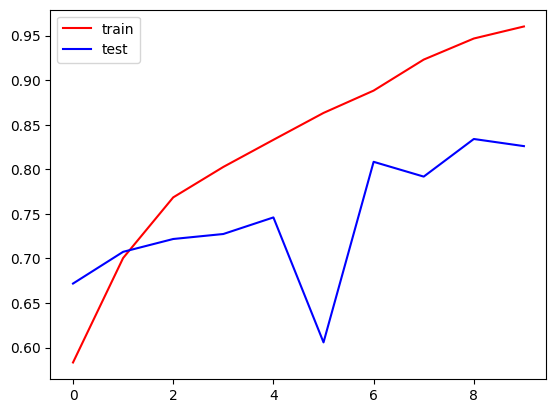

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

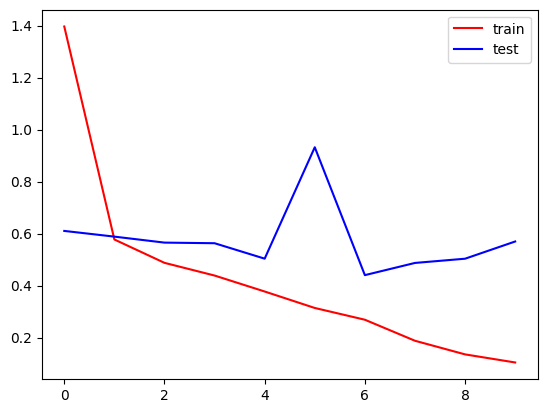

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

In [14]:
import cv2

In [23]:
test_img = cv2.imread('/content/cat.jpg')

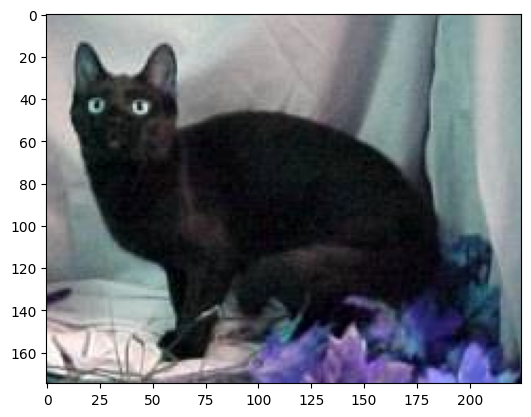

In [24]:
plt.imshow(test_img)

In [25]:
test_img.shape

(175, 225, 3)

In [26]:
test_img = cv2.resize(test_img,(256,256))

In [27]:
test_img = test_img.reshape((1,256,256,3))

In [28]:
model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.]], dtype=float32)

In [29]:
test_img = cv2.imread('/content/dog2.jpg')

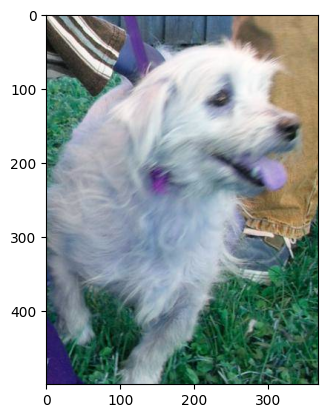

In [30]:
plt.imshow(test_img)

In [31]:
test_img.shape

(500, 368, 3)

In [32]:
test_img = cv2.resize(test_img,(200,200))

In [34]:
test_img = test_img.reshape((1,200,200,3))

In [44]:
model.predict(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[0.]], dtype=float32)

In [45]:
# Save the model in Keras H5 format
model.save('dogs_vs_cats_model.h5')

Image data type: uint8
Image shape: (500, 368, 3)


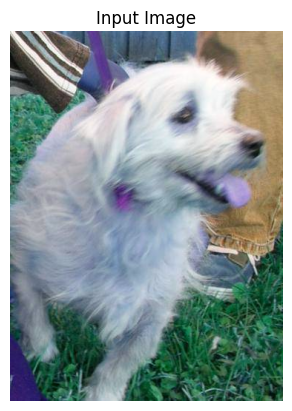

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
It's a dog!


In [38]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Load the trained model
# model = tf.keras.models.load_model('dogs_vs_cats_model.h5') # Uncomment and run this line if you haven't loaded the model yet

# Load the image
test_img_path = '/content/dog2.jpg'  # Change this to the path of your image
test_img = cv2.imread(test_img_path)

# Check if the image was loaded successfully
if test_img is None:
    print(f"Error: Could not load image from {test_img_path}")
else:
    # Add print statements to inspect the image data
    print(f"Image data type: {test_img.dtype}")
    print(f"Image shape: {test_img.shape}")

    # Convert image to a suitable data type if necessary (e.g., uint8)
    if test_img.dtype != np.uint8:
        test_img = test_img.astype(np.uint8)

    # Display the image
    plt.imshow(test_img)
    plt.title("Input Image")
    plt.axis('off')
    plt.show()

    # Resize the image
    test_img_resized = cv2.resize(test_img,(256,256))

    # Reshape the image to match the model input shape
    test_img_reshaped = test_img_resized.reshape((1,256,256,3))

    # Normalize the image (if the model was trained on normalized data)
    test_img_normalized = test_img_reshaped/255.0

    # Make the prediction
    prediction = model.predict(test_img_normalized)

    # Interpret the prediction
    if prediction[0][0] > 0.5:
        print("It's a dog!")
    else:
        print("It's a cat!")

In [ ]:
# Save the model in Keras H5 format
model.save('dogs_vs_cats_model.h5')

In [41]:
%%writefile app.py
import streamlit as st
from  PIL import Image
import tensorflow as tf
 model = tf.keras.models.load_model('dogs_vs_cats_model.h5')

Writing app.py


In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.185.245.50:8501

